Primeras filas del dataset:
   record  mean_rr  std_rr  skew_rr  kurt_rr label
0  A00001   761.67   61.30     1.06     7.72     N
1  A00002   819.44  258.53    -0.74    -1.11     N
2  A00003   916.26  452.40     2.26     7.25     N
3  A00004   936.04  178.68     0.57    -0.86     A
4  A00005   537.45  217.84     1.23     0.21     A

Descripción estadística:
           mean_rr       std_rr      skew_rr      kurt_rr
count  5546.000000  5546.000000  5546.000000  5546.000000
mean    870.975734   247.925144    -0.352571     4.459378
std     308.339195   432.021434     1.959633     7.292940
min     370.000000     2.400000    -7.430000    -2.000000
25%     720.655000    68.967500    -1.540000    -0.240000
50%     816.820000   141.840000    -0.090000     1.750000
75%     925.247500   240.662500     0.870000     6.310000
max    4283.000000  8292.530000     7.820000    78.170000

Distribución de clases:
label
N    4822
A     724
Name: count, dtype: int64

Tipos de datos:
record      object
mean_

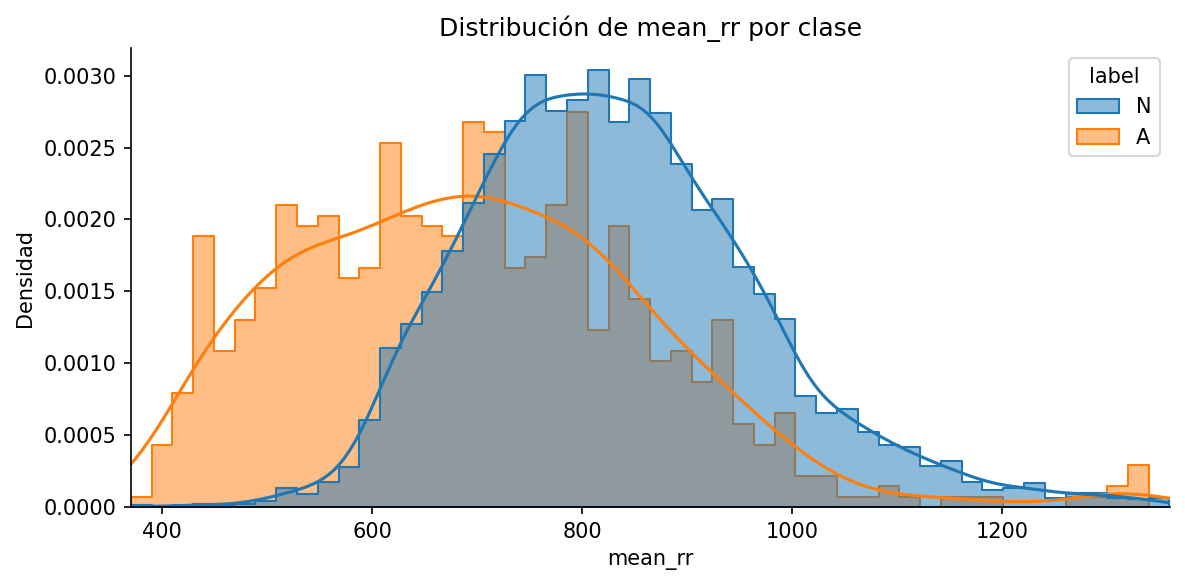

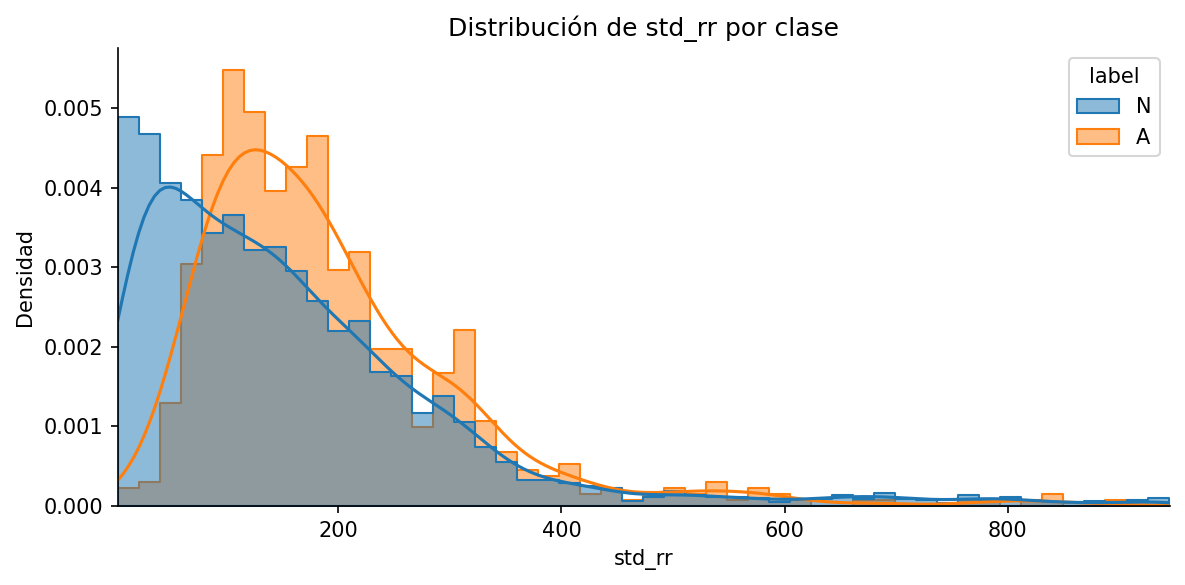

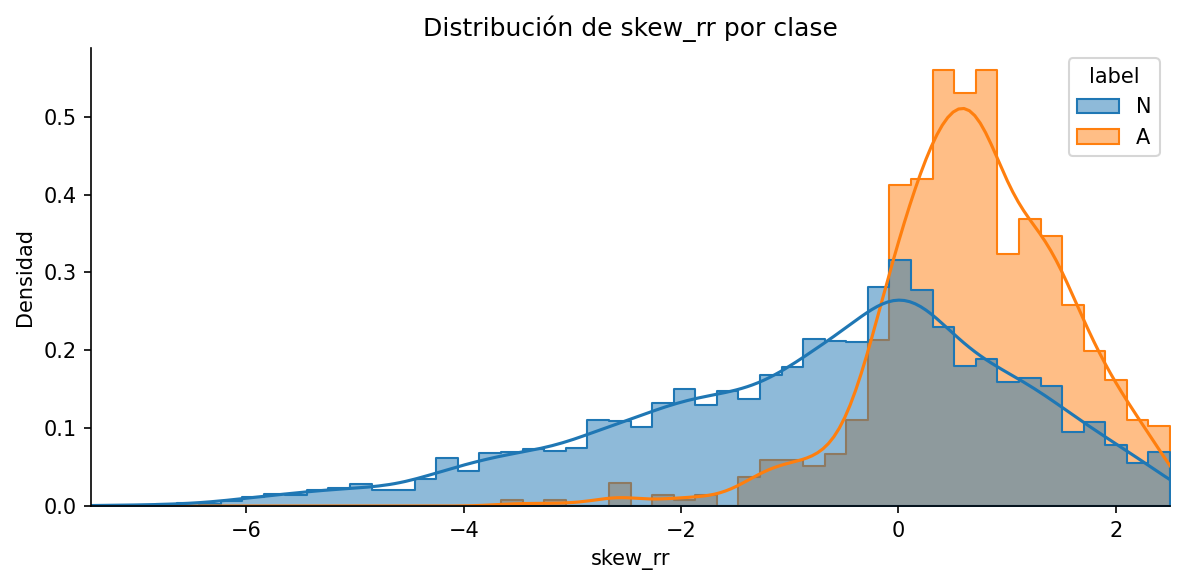

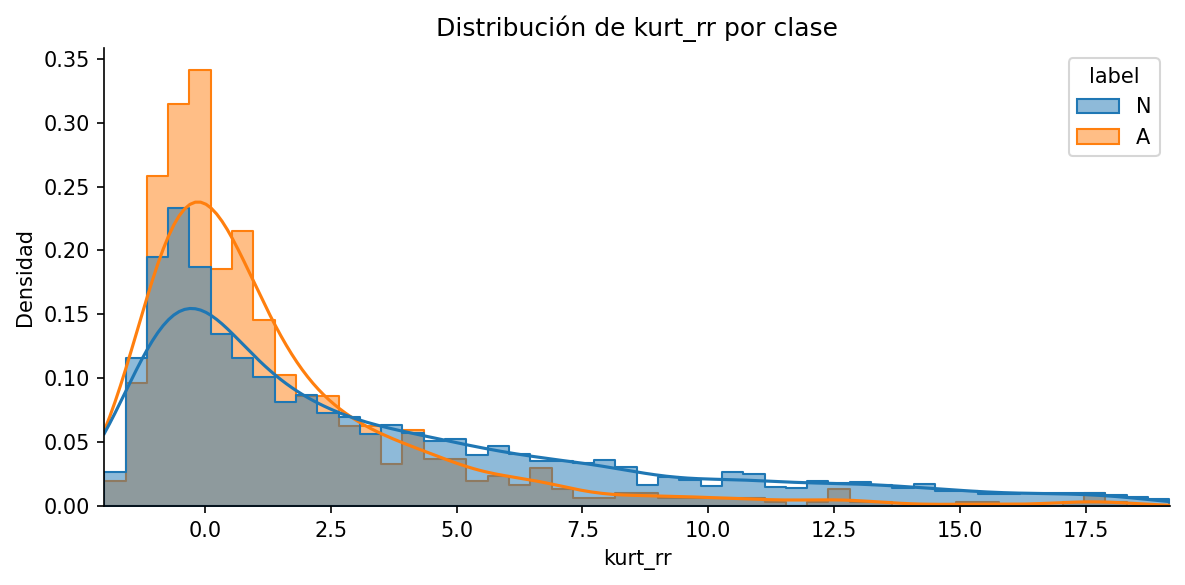

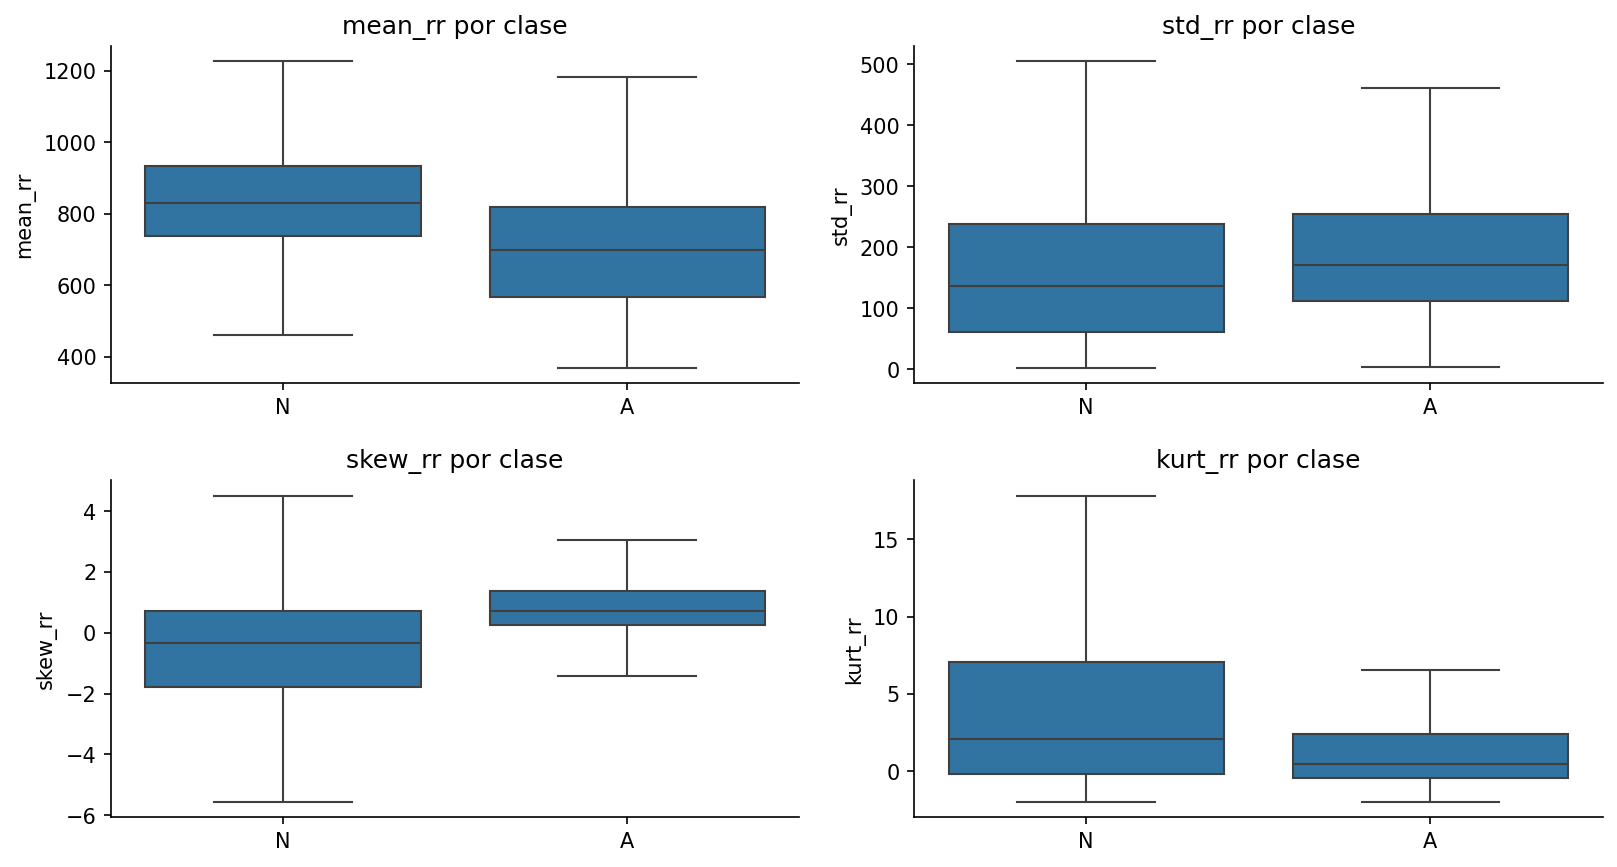

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar CSV
df = pd.read_csv('../data/ecg_rr_features_curado.csv')

# Inspección inicial 
print("Primeras filas del dataset:")
print(df.head())

print("\nDescripción estadística:")
print(df.describe())

print("\nDistribución de clases:")
print(df['label'].value_counts())

print("\nTipos de datos:")
print(df.dtypes)

# Separar clases
df_n = df[df['label'] == 'N']
df_af = df[df['label'] == 'A']

# Variables a analizar
features = ['mean_rr', 'std_rr', 'skew_rr', 'kurt_rr']

# Gráficos de distribución 
for feature in features:
    plt.figure(figsize=(8, 4), dpi=150)

    # Recortar valores extremos
    upper_limit = df[feature].quantile(0.95) 
    df_plot = df[df[feature] <= upper_limit] 

    # hue para colorear de acuerdo a la clase, kde para dibujar una curva de densidad, bins para definir el número de barras
    # common_norm=False para que cada clase tenga su propia normalización, etc
    sns.histplot(
        data=df_plot, x=feature, hue='label', kde=True,
        stat='density', bins=50, element='step',
        common_norm=False, alpha=0.5
    )
    plt.title(f'Distribución de {feature} por clase')
    plt.xlabel(feature)
    plt.ylabel('Densidad')
    plt.xlim(df_plot[feature].min(), upper_limit) # Graficar desde el mínimo hasta el quantil definido
    sns.despine()
    plt.tight_layout()
    plt.show()

# Diagramas de caja
fig, axes = plt.subplots(2, 2, figsize=(11, 6), dpi=150)
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(data=df, x='label', y=feature, ax=axes[i], showfliers=False)
    axes[i].set_title(f'{feature} por clase')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(feature)
    sns.despine(ax=axes[i])

plt.tight_layout(pad=1.5)
plt.show()

### Análisis exploratorio del dataset

#### ¿Qué variables parecen diferenciar más entre clases?

Las variables que muestran mayor poder de discriminación entre ritmos normales (N) y fibrilación auricular (A) son:

- **mean_rr**: el promedio de los intervalos RR tiende a ser menor en los casos con AFib. Esto es coherente con el hecho de que la fibrilación auricular puede provocar latidos más rápidos e irregulares.
- **std_rr**: la desviación estándar es mucho mayor en los registros AFib, lo que refleja la alta variabilidad del ritmo cardiaco.

Estas dos variables muestran una clara separación estadística entre clases. Skewness y kurtosis tienen valores extremos pero con menor consistencia, lo cual limita su capacidad discriminativa confiable.

---

#### ¿Qué aspectos del dataset llaman la atención?

- **Desequilibrio de clases**: hay muchos más ejemplos de clase **Normal (N = 5036)** que de **AFib (A = 738)**. Esto puede afectar el entrenamiento del modelo si no se maneja adecuadamente (por ejemplo, con técnicas de balanceo o ponderación).
- **Alta dispersión en las variables**: particularmente en `std_rr`, `skew_rr` y `kurt_rr`, lo que indica presencia de valores extremos o comportamientos anómalos en ciertas señales.
- **Casos con valores extremos**: por ejemplo, hay registros con `std_rr` de más de 12,000 y `kurt_rr` de hasta 78, lo que sugiere outliers fuertes.
- **Posibles errores o valores nulos**: se observan diferencias en el número de datos por columna (`count`), lo que sugiere valores faltantes en `skew_rr` y `kurt_rr`.
